In [1]:
%pip install --upgrade pip
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install torch
%pip install keras

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""Kyrylo Boiko Lab 6"""

import torch
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [4]:
"""Kyrylo Boiko Lab 6"""

url = r"C:\Users\kyryl\OneDrive\Документы\GitHub\LNU\3rd course\1 semestr\Machine learning systems\fil\machine\household_power_consumption.csv"
df = pd.read_csv(url, sep=',', low_memory=False, parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['nan', '?'])



df = df[['datetime', 'Voltage']].dropna()


scaler = MinMaxScaler(feature_range=(0, 1))
df['Voltage'] = scaler.fit_transform(df[['Voltage']])


C:\Users\kyryl\AppData\Local\Temp\ipykernel_15312\3917928748.py:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(url, sep=',', low_memory=False, parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['nan', '?'])
C:\Users\kyryl\AppData\Local\Temp\ipykernel_15312\3917928748.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(url, sep=',', low_memory=False, parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['nan', '?'])


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kyryl\\OneDrive\\Документы\\GitHub\\LNU\\3rd course\\1 semestr\\Machine learning systems\\fil\\machine\\household_power_consumption.csv'

In [ ]:
"""Kyrylo Boiko Lab 6"""

model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


c:\Users\kyryl\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"""Kyrylo Boiko Lab 6"""

X = df['Voltage'].values.reshape(-1, 1)
y = df['Voltage'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0041 - mean_absolute_error: 0.0126 - val_loss: 3.8781e-08 - val_mean_absolute_error: 4.1989e-05
Epoch 2/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.7592e-07 - mean_absolute_error: 3.9852e-04 - val_loss: 2.4143e-08 - val_mean_absolute_error: 1.1978e-04
Epoch 3/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 6.7493e-07 - mean_absolute_error: 5.1757e-04 - val_loss: 2.0622e-06 - val_mean_absolute_error: 0.0014
Epoch 4/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 6.0705e-07 - mean_absolute_error: 4.6687e-04 - val_loss: 2.1643e-08 - val_mean_absolute_error: 9.2238e-05
Epoch 5/5
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 4.4096e-07 - mean_absolute_error: 3.2449e-04 - val_loss: 1.9652e-07 - val_mean_absolute_error: 4.3970e-04


In [ ]:
"""Kyrylo Boiko Lab 6"""

from sklearn.metrics import r2_score


loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")
print(f"Test R-squared (Accuracy): {r2}")


1543/1543 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 1.9875e-07 - mean_absolute_error: 4.4149e-04
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step
Test Loss: 1.9652374305678677e-07
Test MAE: 0.00043969968101009727
Test R-squared (Accuracy): 0.9999693154383335


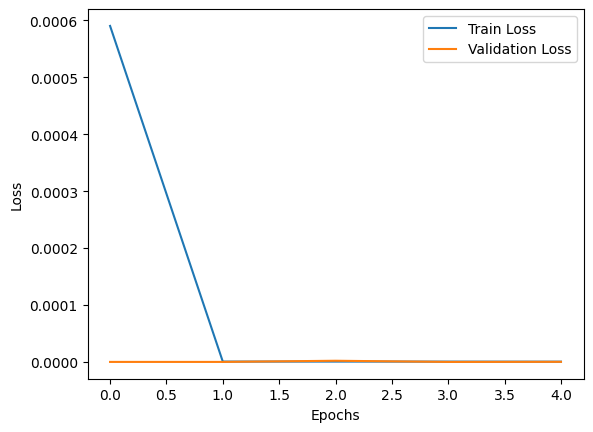

In [ ]:
"""Kyrylo Boiko Lab 6"""

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


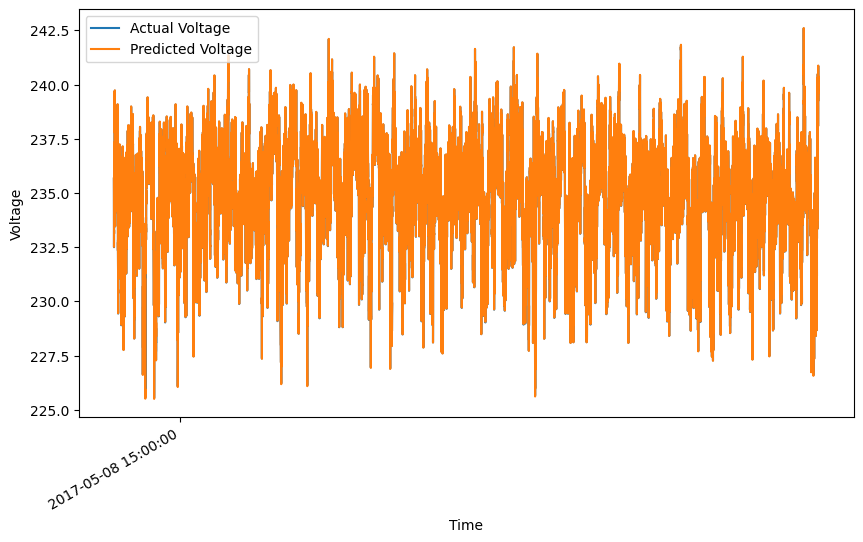

In [ ]:
"""Kyrylo Boiko Lab 6"""

import matplotlib.dates as mdates

y_test_denorm = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_denorm = scaler.inverse_transform(y_pred)

time_test = df['datetime'].values[-len(X_test):]

plt.figure(figsize=(10, 6))
plt.plot(time_test, y_test_denorm, label='Actual Voltage')
plt.plot(time_test, y_pred_denorm, label='Predicted Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1000))
plt.gcf().autofmt_xdate()

plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


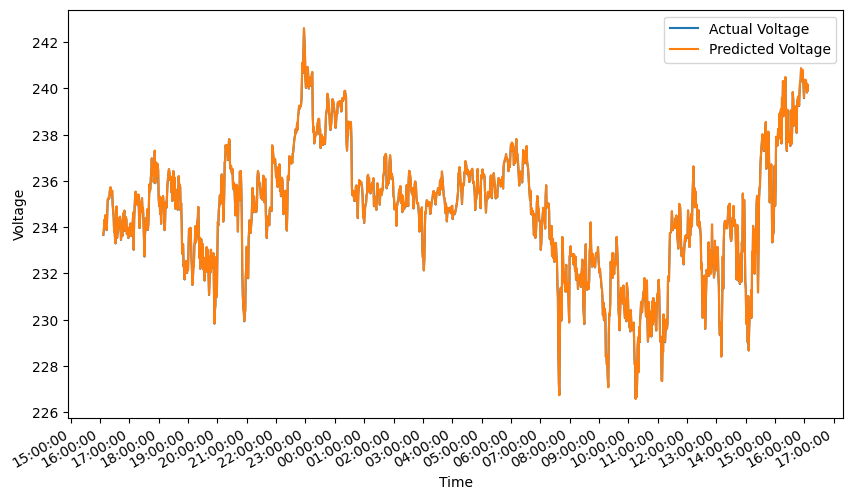

In [ ]:
"""Kyrylo Boiko Lab 6"""

import matplotlib.dates as mdates

start_time = df['datetime'].max() - pd.Timedelta(days=1)
df_24_hours = df[df['datetime'] >= start_time]

X_test_24 = df_24_hours['Voltage'].values.reshape(-1, 1)
y_test_24 = df_24_hours['Voltage'].values

y_pred_24 = model.predict(X_test_24)

y_test_24_denorm = scaler.inverse_transform(y_test_24.reshape(-1, 1))
y_pred_24_denorm = scaler.inverse_transform(y_pred_24)

time_test_24 = df_24_hours['datetime'].values

plt.figure(figsize=(10, 6))
plt.plot(time_test_24, y_test_24_denorm, label='Actual Voltage')
plt.plot(time_test_24, y_pred_24_denorm, label='Predicted Voltage')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()
